# Filtering candidate labels
In this notebook, we will analyze the labels created in the candidate_label_creation notebook and then use a simple rule-based filter to remove labels that are trivially either unrepresentative or indistinctive.

We'll look at each type of label separately.

In [52]:
import os
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import numpy as np

In [26]:
work_dir = "/Users/nicklein/Documents/grad_school/Research/data"

os.environ['STORE'] = "{}/wikidata.sqlite3.db".format(work_dir)
os.environ['DATA'] = "{}/Q44".format(work_dir)
os.environ['NAME'] = "Q44"
os.environ["OUT"] = "{}/Q44_profiler_output".format(work_dir)

label_file_prefix = "{}/Q44_profiler_output/Q44.".format(work_dir)

In [68]:
def filter_by_support_and_plot(support_file, filtered_out_file, filtered_file, alpha = .1):
    df = pd.read_csv(support_file, delimiter = '\t')
    
    supports = df.loc[:,"support"]
    
    mask_filtered_out = ((supports < alpha) | (supports > (1 - alpha)))
    filtered_out = supports.loc[mask_filtered_out]
    not_filtered_out = supports.loc[~mask_filtered_out]
    
    print("Number of labels filtered out: {} / {} ({:.2f}%)".format(len(filtered_out), len(supports), 100*(len(filtered_out) / len(supports))))
    
    bins = np.arange(0,1.01,.02)
    plt.hist(filtered_out, label = "filtered out", bins = bins)
    plt.hist(not_filtered_out, label = "not filtered out", bins = bins)
    
    plt.title("Distribution of Label Supports")
    plt.legend()
    plt.show()
    
    df_filtered_out = df.loc[mask_filtered_out]
    df_not_filtered_out = df.loc[~mask_filtered_out]
    
    df_filtered_out.to_csv(filtered_out_file, sep='\t')
    df_not_filtered_out.to_csv(filtered_file, sep='\t')

## AVL - string labels

Adding support column

In [71]:
!kgtk query -i $OUT/$NAME.entity_counts_per_type.tsv -i $OUT/$NAME.candidate_labels_avl_string.tsv \
-o $OUT/$NAME.candidate_labels_avl_string_supports_temp.tsv \
--graph-cache $STORE \
--match 'candidate: (type)-[l1 {label:prop, positives:pos, property_label:lab}]->(val), counts_per_type: (type)-[]->(count)' \
--return 'type as type, prop as prop, val as val, lab as prop_label, kgtk_quantity_number_float(pos)/kgtk_quantity_number(count) as support, "_" as id' \
--order-by 'kgtk_quantity_number_float(pos)/kgtk_quantity_number(count)'

In [72]:
!kgtk rename-columns -i $OUT/$NAME.candidate_labels_avl_string_supports_temp.tsv -o $OUT/$NAME.candidate_labels_avl_string_supports_temp1.tsv \
--old-columns type prop val --new-columns node1 label node2 

In [73]:
!kgtk add-id -i $OUT/$NAME.candidate_labels_avl_string_supports_temp1.tsv \
-o $OUT/$NAME.candidate_labels_avl_string_supports.tsv --overwrite-id

Filter labels based on support value, send to files, and plot distribution of label support.

Number of labels filtered out: 2530 / 3682 (68.71%)


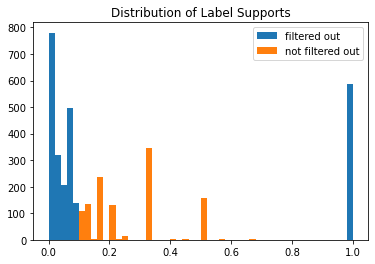

In [74]:
avl_str_supports_file = "{}candidate_labels_avl_string_supports.tsv".format(label_file_prefix)
filtered_out_file = "{}candidate_labels_avl_string_filtered_out.tsv".format(label_file_prefix)
filtered_file = "{}candidate_labels_avl_string_filtered.tsv".format(label_file_prefix)
filter_by_support_and_plot(avl_str_supports_file, filtered_out_file, filtered_file)

## AVL - time.year labels

Adding support column

In [75]:
!kgtk query -i $OUT/$NAME.entity_counts_per_type.tsv -i $OUT/$NAME.candidate_labels_avl_time.year.tsv \
-o $OUT/$NAME.candidate_labels_avl_time.year_supports_temp.tsv \
--graph-cache $STORE \
--match 'candidate: (type)-[l1 {label:prop, positives:pos, property_label:lab}]->(val), counts_per_type: (type)-[]->(count)' \
--return 'type as type, prop as prop, val as val, lab as prop_label, kgtk_quantity_number_float(pos)/kgtk_quantity_number(count) as support, "_" as id' \
--order-by 'kgtk_quantity_number_float(pos)/kgtk_quantity_number(count)'

In [76]:
!kgtk rename-columns -i $OUT/$NAME.candidate_labels_avl_time.year_supports_temp.tsv -o $OUT/$NAME.candidate_labels_avl_time.year_supports_temp1.tsv \
--old-columns type prop val --new-columns node1 label node2 

In [77]:
!kgtk add-id -i $OUT/$NAME.candidate_labels_avl_time.year_supports_temp1.tsv \
-o $OUT/$NAME.candidate_labels_avl_time.year_supports.tsv --overwrite-id

Filter labels based on support value, send to files, and plot distribution of label support.

Number of labels filtered out: 378 / 538 (70.26%)


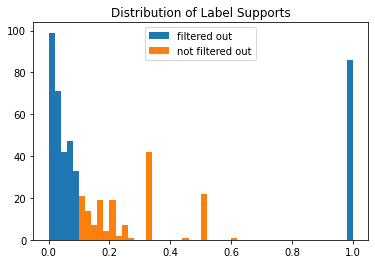

In [78]:
avl_str_supports_file = "{}candidate_labels_avl_time.year_supports.tsv".format(label_file_prefix)
filtered_out_file = "{}candidate_labels_avl_time.year_filtered_out.tsv".format(label_file_prefix)
filtered_file = "{}candidate_labels_avl_time.year_filtered.tsv".format(label_file_prefix)
filter_by_support_and_plot(avl_str_supports_file, filtered_out_file, filtered_file)

## AVL - quantity labels

Adding support column

In [79]:
!kgtk query -i $OUT/$NAME.entity_counts_per_type.tsv -i $OUT/$NAME.candidate_labels_avl_quantity.tsv \
-o $OUT/$NAME.candidate_labels_avl_quantity_supports_temp.tsv \
--graph-cache $STORE \
--match 'candidate: (type)-[l1 {label:prop, positives:pos, property_label:lab}]->(val), counts_per_type: (type)-[]->(count)' \
--return 'type as type, prop as prop, val as val, lab as prop_label, kgtk_quantity_number_float(pos)/kgtk_quantity_number(count) as support, "_" as id' \
--order-by 'kgtk_quantity_number_float(pos)/kgtk_quantity_number(count)'

In [80]:
!kgtk rename-columns -i $OUT/$NAME.candidate_labels_avl_quantity_supports_temp.tsv -o $OUT/$NAME.candidate_labels_avl_quantity_supports_temp1.tsv \
--old-columns type prop val --new-columns node1 label node2 

In [81]:
!kgtk add-id -i $OUT/$NAME.candidate_labels_avl_quantity_supports_temp1.tsv \
-o $OUT/$NAME.candidate_labels_avl_quantity_supports.tsv --overwrite-id

Filter labels based on support value, send to files, and plot distribution of label support.

Number of labels filtered out: 53579 / 73886 (72.52%)


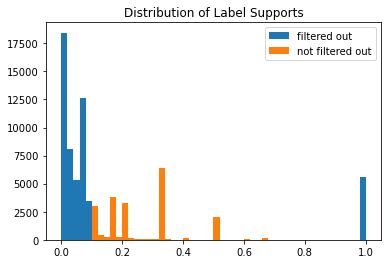

In [82]:
avl_str_supports_file = "{}candidate_labels_avl_quantity_supports.tsv".format(label_file_prefix)
filtered_out_file = "{}candidate_labels_avl_quantity_filtered_out.tsv".format(label_file_prefix)
filtered_file = "{}candidate_labels_avl_quantity_filtered.tsv".format(label_file_prefix)
filter_by_support_and_plot(avl_str_supports_file, filtered_out_file, filtered_file)

## RELs

Adding support column

In [83]:
!kgtk query -i $OUT/$NAME.entity_counts_per_type.tsv -i $OUT/$NAME.candidate_labels_rel_item.tsv \
-o $OUT/$NAME.candidate_labels_rel_item_supports_temp.tsv \
--graph-cache $STORE \
--match 'candidate: (type)-[l1 {label:prop, positives:pos, property_label:lab}]->(val), counts_per_type: (type)-[]->(count)' \
--return 'type as type, prop as prop, val as val, lab as prop_label, kgtk_quantity_number_float(pos)/kgtk_quantity_number(count) as support, "_" as id' \
--order-by 'kgtk_quantity_number_float(pos)/kgtk_quantity_number(count)'

In [84]:
!kgtk rename-columns -i $OUT/$NAME.candidate_labels_rel_item_supports_temp.tsv -o $OUT/$NAME.candidate_labels_rel_item_supports_temp1.tsv \
--old-columns type prop val --new-columns node1 label node2 

In [92]:
!kgtk add-id -i $OUT/$NAME.candidate_labels_rel_item_supports_temp1.tsv \
-o $OUT/$NAME.candidate_labels_rel_item_supports.tsv --overwrite-id

Filter labels based on support value, send to files, and plot distribution of label support.

Number of labels filtered out: 27715 / 46774 (59.25%)


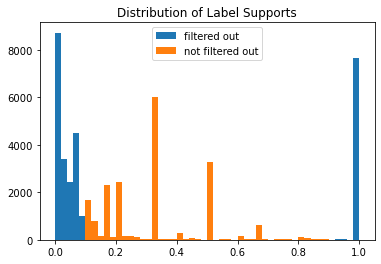

In [86]:
avl_str_supports_file = "{}candidate_labels_rel_item_supports.tsv".format(label_file_prefix)
filtered_out_file = "{}candidate_labels_rel_item_filtered_out.tsv".format(label_file_prefix)
filtered_file = "{}candidate_labels_rel_item_filtered.tsv".format(label_file_prefix)
filter_by_support_and_plot(avl_str_supports_file, filtered_out_file, filtered_file)

## RALs

Adding support column

In [88]:
!kgtk query -i $OUT/$NAME.entity_counts_per_type.tsv -i $OUT/$NAME.candidate_labels_ral.tsv \
-o $OUT/$NAME.candidate_labels_ral_supports_temp.tsv \
--graph-cache $STORE \
--match 'candidate: (type1)-[l1 {label:prop1, prop2:prop2, positives:pos, prop2_label:lab, value:val}]->(type2), counts_per_type: (type1)-[]->(count)' \
--return 'type1 as type1, prop1 as prop1, type2 as type2, prop2 as prop2, val as val, lab as prop2_label, kgtk_quantity_number_float(pos)/kgtk_quantity_number(count) as support, "_" as id' \
--order-by 'kgtk_quantity_number_float(pos)/kgtk_quantity_number(count)'

In [89]:
!kgtk rename-columns -i $OUT/$NAME.candidate_labels_ral_supports_temp.tsv -o $OUT/$NAME.candidate_labels_ral_supports_temp1.tsv \
--old-columns type1 prop1 type2 --new-columns node1 label node2 

In [91]:
!kgtk add-id -i $OUT/$NAME.candidate_labels_ral_supports_temp1.tsv \
-o $OUT/$NAME.candidate_labels_ral_supports.tsv --overwrite-id

Filter labels based on support value, send to files, and plot distribution of label support.

Number of labels filtered out: 1629630 / 3357076 (48.54%)


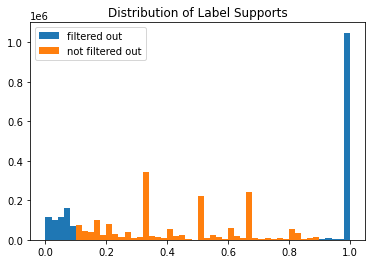

In [93]:
avl_str_supports_file = "{}candidate_labels_ral_supports.tsv".format(label_file_prefix)
filtered_out_file = "{}candidate_labels_ral_filtered_out.tsv".format(label_file_prefix)
filtered_file = "{}candidate_labels_ral_filtered.tsv".format(label_file_prefix)
filter_by_support_and_plot(avl_str_supports_file, filtered_out_file, filtered_file)

## AIL - years bucketed to fixed interval of 5 years

Adding support column

In [94]:
!kgtk query -i $OUT/$NAME.entity_counts_per_type.tsv -i $OUT/$NAME.candidate_labels_ail_time.year.tsv \
-o $OUT/$NAME.candidate_labels_ail_time.year_supports_temp.tsv \
--graph-cache $STORE \
--match 'candidate: (type)-[l1 {label:prop, upper_bound:ub, positives:pos, property_label:lab}]->(lb), counts_per_type: (type)-[]->(count)' \
--return 'type as type, prop as prop, lb as lower_bound, ub as upper_bound, lab as prop_label, kgtk_quantity_number_float(pos)/kgtk_quantity_number(count) as support, "_" as id' \
--order-by 'kgtk_quantity_number_float(pos)/kgtk_quantity_number(count)'

In [95]:
!kgtk rename-columns -i $OUT/$NAME.candidate_labels_ail_time.year_supports_temp.tsv -o $OUT/$NAME.candidate_labels_ail_time.year_supports_temp1.tsv \
--old-columns type prop lower_bound --new-columns node1 label node2 

In [96]:
!kgtk add-id -i $OUT/$NAME.candidate_labels_ail_time.year_supports_temp1.tsv \
-o $OUT/$NAME.candidate_labels_ail_time.year_supports.tsv --overwrite-id

Filter labels based on support value, send to files, and plot distribution of label support.

Number of labels filtered out: 302 / 458 (65.94%)


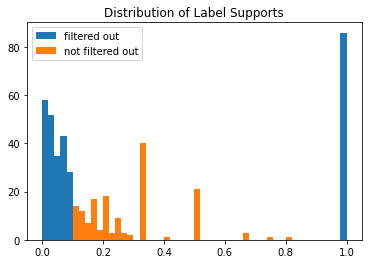

In [97]:
avl_str_supports_file = "{}candidate_labels_ail_time.year_supports.tsv".format(label_file_prefix)
filtered_out_file = "{}candidate_labels_ail_time.year_filtered_out.tsv".format(label_file_prefix)
filtered_file = "{}candidate_labels_ail_time.year_filtered.tsv".format(label_file_prefix)
filter_by_support_and_plot(avl_str_supports_file, filtered_out_file, filtered_file)